In [98]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import random
from matplotlib import pyplot as plt


In [99]:
# loading data set
data = pd.read_csv('../inputs/Preprocessed_data.csv')

In [100]:
# printing information of dataset
print(data.info)

<bound method DataFrame.info of          Unnamed: 0  user_id                   location      age        isbn  \
0                 0        2  stockton, california, usa  18.0000  0195153448   
1                 1        8   timmins, ontario, canada  34.7439  0002005018   
2                 2    11400    ottawa, ontario, canada  49.0000  0002005018   
3                 3    11676              n/a, n/a, n/a  34.7439  0002005018   
4                 4    41385   sudbury, ontario, canada  34.7439  0002005018   
...             ...      ...                        ...      ...         ...   
1031170     1031170   278851         dallas, texas, usa  33.0000  0743203763   
1031171     1031171   278851         dallas, texas, usa  33.0000  0767907566   
1031172     1031172   278851         dallas, texas, usa  33.0000  0884159221   
1031173     1031173   278851         dallas, texas, usa  33.0000  0912333022   
1031174     1031174   278851         dallas, texas, usa  33.0000  1569661057   

       

In [101]:
# showing features of dataset
print(data.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['Unnamed: 0', 'user_id', 'location', 'age', 'isbn', 'rating',
       'book_title', 'book_author', 'year_of_publication', 'publisher',
       'img_s', 'img_m', 'img_l', 'Summary', 'Language', 'Category', 'city',
       'state', 'country'],
      dtype='object')>


In [102]:
# printing first 6 row
data.head(3)


,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada


In [103]:
# printing last 6 row
data.tail(3)

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
1031172,1031172,278851,"dallas, texas, usa",33.0,0884159221,7,Why stop?: A guide to Texas historical roadsid...,Claude Dooley,1985.0,Lone Star Books,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,http://images.amazon.com/images/P/0884159221.0...,9,9,9,dallas,texas,usa
1031173,1031173,278851,"dallas, texas, usa",33.0,0912333022,7,The Are You Being Served? Stories: 'Camping In...,Jeremy Lloyd,1997.0,Kqed Books,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,http://images.amazon.com/images/P/0912333022.0...,These hilarious stories by the creator of publ...,en,['Fiction'],dallas,texas,usa
1031174,1031174,278851,"dallas, texas, usa",33.0,1569661057,10,"Dallas Street Map Guide and Directory, 2000 Ed...",Mapsco,1999.0,American Map Corporation,http://images.amazon.com/images/P/1569661057.0...,http://images.amazon.com/images/P/1569661057.0...,http://images.amazon.com/images/P/1569661057.0...,9,9,9,dallas,texas,usa


# dropping unuse features

In [104]:
dropped_data = data.drop(['img_s', 'img_m', 'img_l'], axis=1)
dropped_data = dropped_data[dropped_data['Category'] != '9']
dropped_data.head(3)

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada


# the relationship between book languages ​​and the number of books

In [105]:
# filtering unique languaes
unique_languages = dropped_data['Language'].drop_duplicates(keep='first')
unique_lan_len = unique_languages.shape[0]

language_book_count = []

for lan in range(0, unique_lan_len - 1, 1):
    language_book_count.append(dropped_data[dropped_data['Language'] == unique_languages.iloc[lan]].shape[0])


for i in range(0, unique_lan_len - 1, 1):
    print(f'Language code: {unique_languages.iloc[i]} - book count:{language_book_count[i]}')

Language code: en - book count:614337
Language code: de - book count:3721
Language code: fr - book count:2492
Language code: es - book count:3306
Language code: ca - book count:42
Language code: it - book count:731
Language code: da - book count:102
Language code: nl - book count:141
Language code: pt - book count:84
Language code: gl - book count:11
Language code: ro - book count:2
Language code: no - book count:11
Language code: el - book count:6
Language code: ms - book count:11
Language code: la - book count:9
Language code: ru - book count:23
Language code: zh-CN - book count:9
Language code: ga - book count:4
Language code: pl - book count:1
Language code: tl - book count:1
Language code: th - book count:6
Language code: ja - book count:6
Language code: cy - book count:1
Language code: fa - book count:2
Language code: eo - book count:2
Language code: gd - book count:2
Language code: hi - book count:1
Language code: vi - book count:3
Language code: ar - book count:3
Language code:

<AxesSubplot:xlabel='Languages code'>

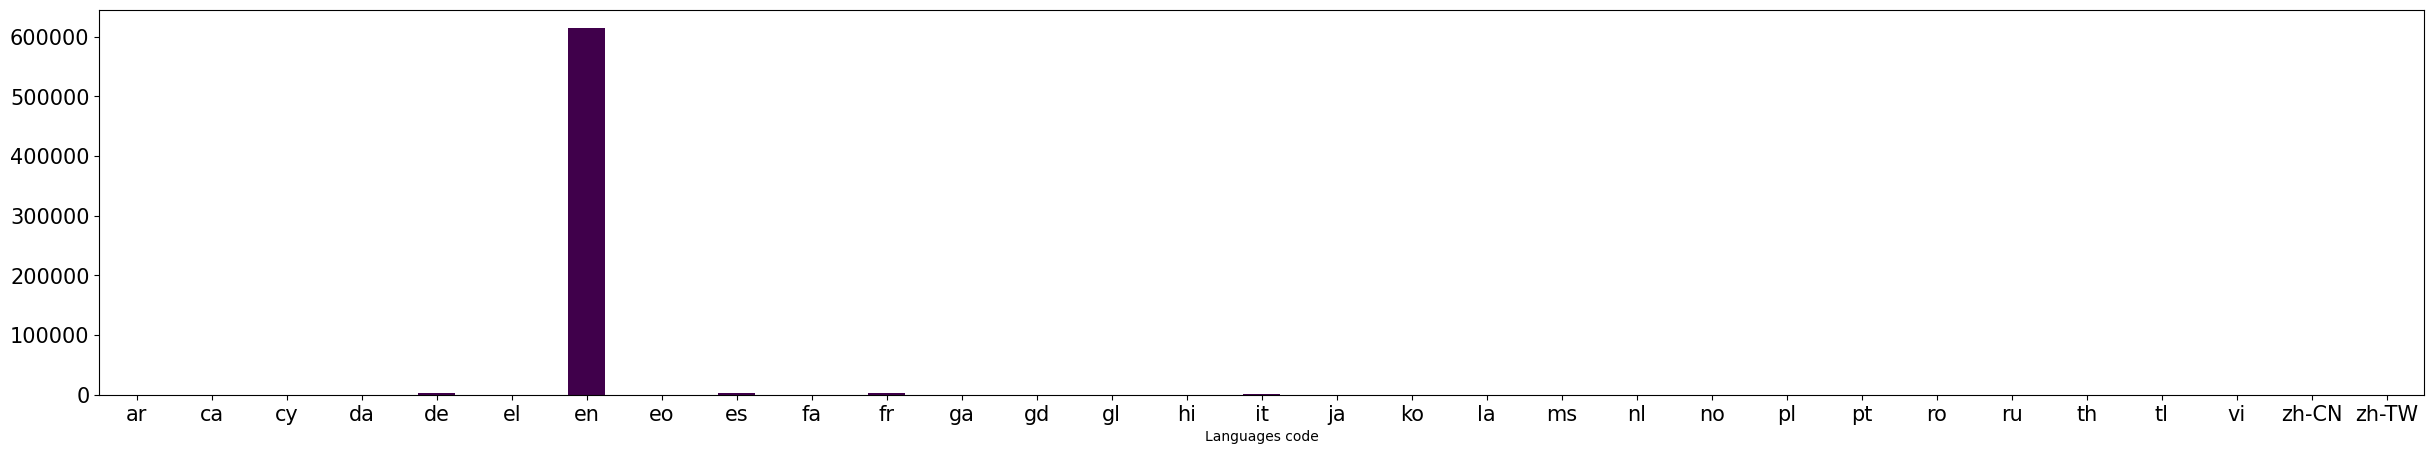

In [106]:
x_label = 'Languages code'
dropped_data.groupby('Language').size().plot(kind='bar',xlabel=x_label, fontsize='15', rot=0, cmap='PRGn', figsize=[30, 5])


# Select random author

In [107]:
# length of data
len_row = dropped_data.shape[0]
# picking random number
random_num = random.randint(0, len_row - 1)

# random publisher
random_author_name = dropped_data.iloc[random_num]['book_author']
author_row = dropped_data[dropped_data['book_author'] == random_author_name]

# we assume that if rating is zero then we dropped it
author_row = author_row[author_row['rating'] != 0]
author_row.drop_duplicates(subset=['book_title'], keep='first')

author_row.head(3)

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,Summary,Language,Category,city,state,country
29660,29660,1435,"st. louis, missouri, usa",36.0000,0345387651,5,The Cider House Rules,John Irving,1994.0,Ballantine Books,The practices of Dr. Wilbur Larch--obstetricia...,en,['Fiction'],st. louis,missouri,usa
29661,29661,5942,"harrisburg, missouri, usa",34.7439,0345387651,7,The Cider House Rules,John Irving,1994.0,Ballantine Books,The practices of Dr. Wilbur Larch--obstetricia...,en,['Fiction'],harrisburg,missouri,usa
29663,29663,6789,"boise, idaho, usa",34.7439,0345387651,7,The Cider House Rules,John Irving,1994.0,Ballantine Books,The practices of Dr. Wilbur Larch--obstetricia...,en,['Fiction'],boise,idaho,usa


# 

# The distribution of the books written by the author by category

<AxesSubplot:title={'center':"relationship of categories and author's books"}>

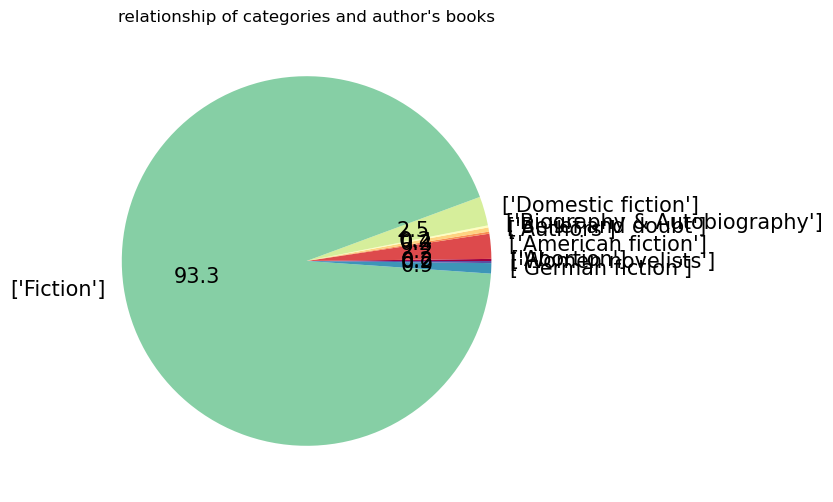

In [108]:

title = "relationship of categories and author's books"
author_row.groupby('Category').size().plot(kind='pie', ylabel='', fontsize='15', rot=0, autopct='%.1f', cmap='Spectral', figsize=[20, 6], title=title)


# The relationship between the publish years of the books written by the author and their rates

<function matplotlib.pyplot.show(close=None, block=None)>

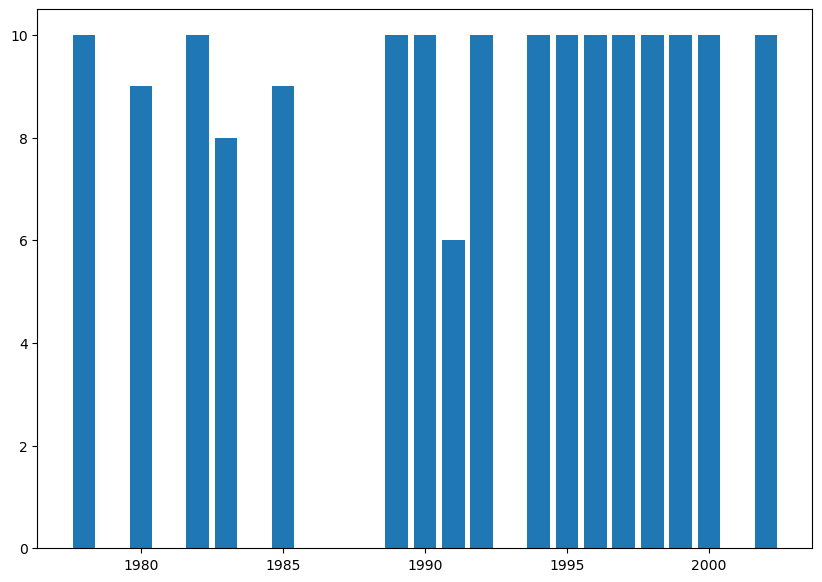

In [109]:
# gets rate of author's books
author_row_book_rates = author_row['rating']
# gets author's books publish year
author_row_book_publish_year = author_row['year_of_publication']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
plt.bar(author_row_book_publish_year, author_row_book_rates)

# Horizontal Bar Plot
plt.show

In [110]:
# showing average rate of author's books
print(f"Mean of rates: {author_row_book_rates.mean()}")

Mean of rates: 8.005454545454546


# Medical books published by year

<AxesSubplot:title={'center':'Change of Medical book counts in years'}, xlabel='Medical'>

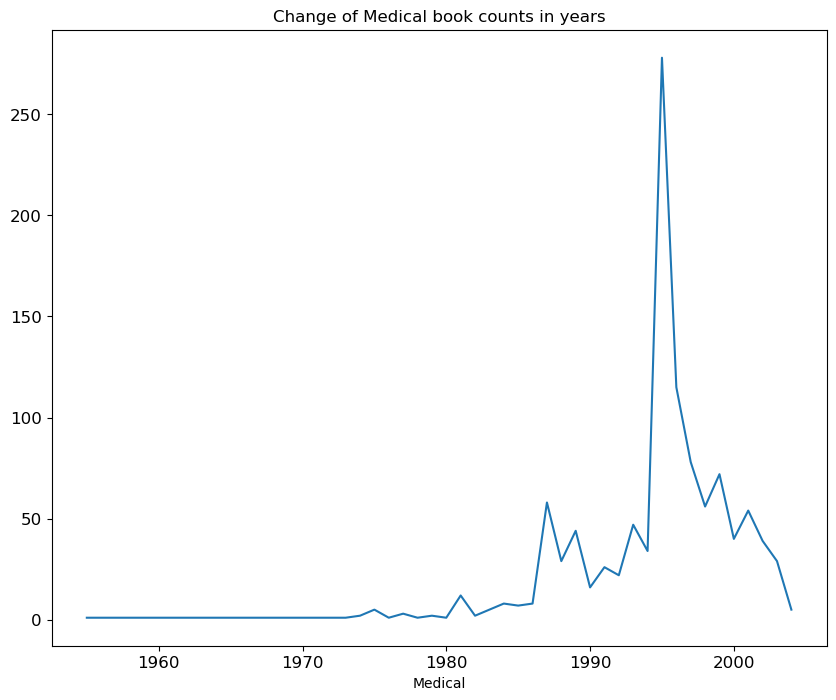

In [111]:
cat_data = dropped_data[dropped_data['Category'] == "['Medical']"] # taking medical books

# group by with publication years and showing plot
cat_data.groupby('year_of_publication').size().plot(figsize=(10, 8), fontsize=12, xlabel='Medical', title=f'Change of Medical book counts in years')

# Another graph for showing 'medical books published by year'

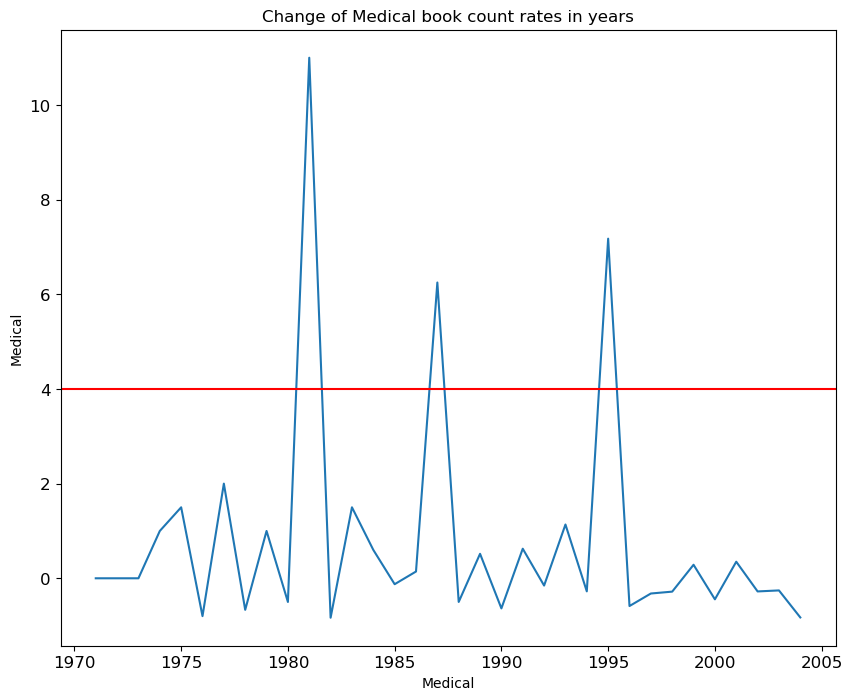

In [112]:
temp_data = cat_data.groupby('year_of_publication').size().pct_change()
temp_data.plot(figsize=(10, 8), fontsize=12)

# text settings
plt.title(label=f'Change of Medical book count rates in years')
plt.xlabel(xlabel='Medical')
plt.ylabel(ylabel='Medical')

# putting line
plt.axhline(y=4, color='r', linestyle='-')
plt.show()



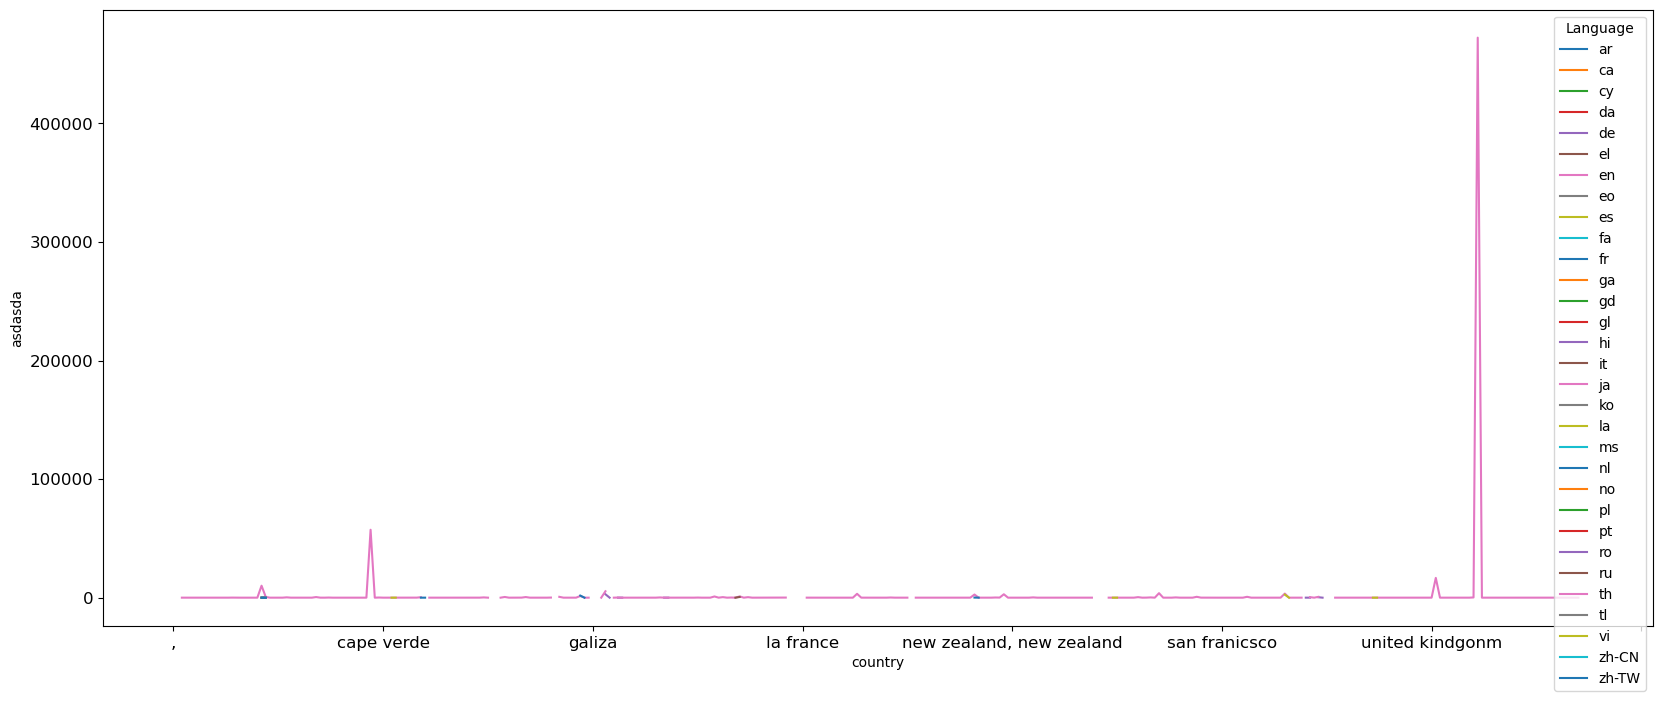

In [113]:
temp_lan = dropped_data['Language']
temp_data = dropped_data.groupby(['country', temp_lan]).size()
temp_data.unstack().plot(figsize=(20, 8), fontsize=12)
plt.ylabel('asdasda')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

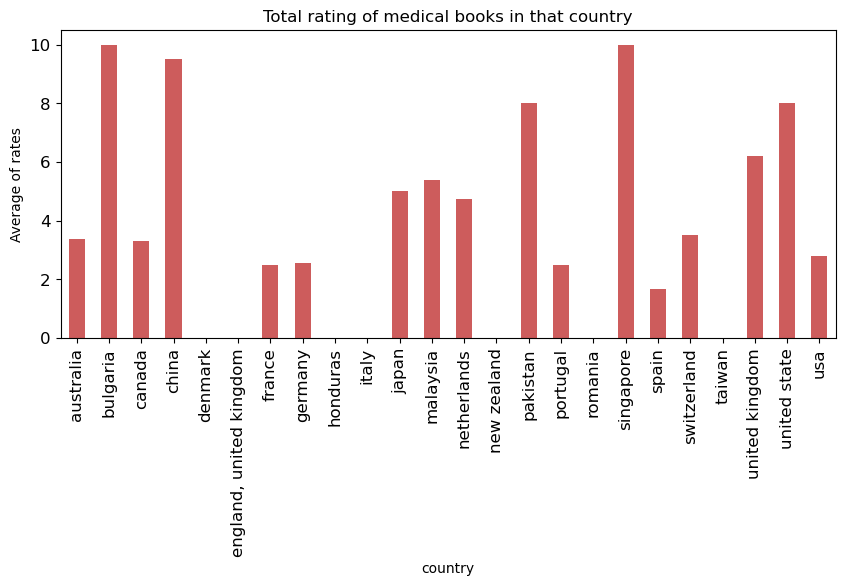

In [114]:
temp_data = dropped_data[dropped_data['Category'] == "['Medical']"].groupby('country')['rating'].mean()
temp_data.plot(kind='bar', figsize=(10,4), fontsize=12, color="IndianRed")
plt.title('Total rating of medical books in that country')
plt.ylabel('Average of rates')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

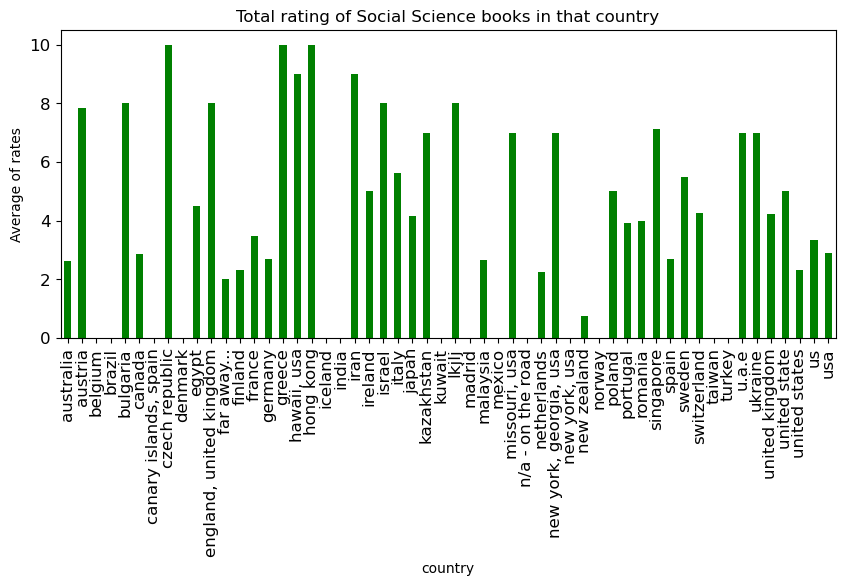

In [115]:
# countries = dropped_data.query("country != 'usa'")['country'] # we are dropping usa

temp_data = dropped_data[dropped_data['Category'] == "['Social Science']"].groupby('country')['rating'].mean()
temp_data.plot(kind='bar', figsize=(10,4), fontsize=12, color="green")
plt.title('Total rating of Social Science books in that country')
plt.ylabel('Average of rates')
plt.show